<a href="https://colab.research.google.com/github/mdwalid/Image-Data-Augmentation-fo-DeepLearning/blob/master/Image_Data_Augmentation_with_Keras_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.3.0


In [4]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Rotation

In [5]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

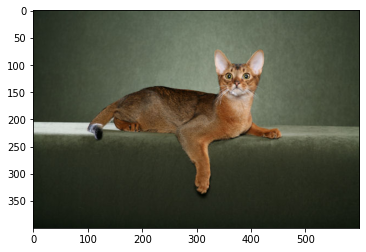

In [6]:
image_path = '/content/gdrive/My Drive/other1/aummentation/images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


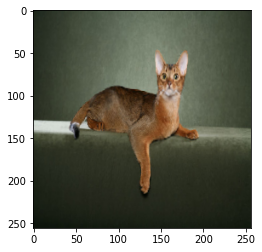

In [8]:
x, y = next(generator.flow_from_directory('/content/gdrive/My Drive/other1/aummentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [9]:
y

array([[1.]], dtype=float32)

#Width and Height Shifts

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50,50]
)

Found 1 images belonging to 1 classes.


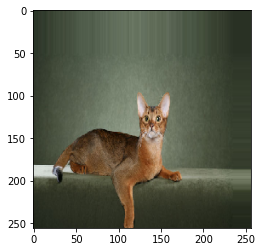

In [14]:
x, y = next(generator.flow_from_directory('/content/gdrive/My Drive/other1/aummentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#Brightness

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

x, y = next(generator.flow_from_directory('/content/gdrive/My Drive/other1/aummentation/imagess', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#Shear Transformation

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory('/content/gdrive/My Drive/other1/aummentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#Zoom

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('/content/gdrive/My Drive/other1/aummentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#Channel Shift

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('/content/gdrive/My Drive/other1/aummentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#Flips

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('/content/gdrive/My Drive/other1/aummentation/images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

#Normalization

### Featurewise

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 11s 0us/step


In [18]:
x, y = next(generator.flow(x_train, y_train, batch_size=10))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.15136391 0.9606382 [[2]
 [6]
 [9]
 [3]
 [2]
 [9]
 [0]
 [3]
 [5]
 [9]]
120.70756512369792


In [19]:
y

array([[2],
       [6],
       [9],
       [3],
       [2],
       [9],
       [0],
       [3],
       [5],
       [9]], dtype=uint8)

### Samplewise

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 1.0 [[5]]


In [26]:
y_train[5]

array([1], dtype=uint8)

# Rescale and Preprocessing Function

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rescale=1.
)

In [28]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [29]:
print(x.mean(), x.std(), y)

-0.1494715 0.28329396 [[7]]


In [42]:
x_train.shape

(50000, 32, 32, 3)

# Using in Model Training

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(32, 32, 3), pooling='avg'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=128),
    steps_per_epoch=10, epochs=100
)

Epoch 1/100
10/10 [==============================] - 2s 232ms/step - loss: 2.6419 - accuracy: 0.0469
Epoch 2/100
10/10 [==============================] - 2s 227ms/step - loss: 2.3194 - accuracy: 0.0750
Epoch 3/100
10/10 [==============================] - 2s 225ms/step - loss: 1.9641 - accuracy: 0.1094
Epoch 4/100
10/10 [==============================] - 2s 224ms/step - loss: 2.0141 - accuracy: 0.1063
Epoch 5/100
10/10 [==============================] - 2s 229ms/step - loss: 1.9505 - accuracy: 0.0906
Epoch 6/100
10/10 [==============================] - 2s 224ms/step - loss: 1.8325 - accuracy: 0.1469
Epoch 7/100
10/10 [==============================] - 2s 226ms/step - loss: 1.8814 - accuracy: 0.0375
Epoch 8/100
10/10 [==============================] - 2s 224ms/step - loss: 1.7662 - accuracy: 0.0375
Epoch 9/100
10/10 [==============================] - 2s 225ms/step - loss: 1.7325 - accuracy: 0.0469
Epoch 10/100
10/10 [==============================] - 2s 228ms/step - loss: 1.5661 - accura

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, input_shape=(32, 32, 3),activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
 

In [64]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
len(y)


32